# Bank_Personal_Loan_Modelling

# Data Description: 
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. 

# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget. 

# Attribute Information: 
ID          : Customer ID                                                                           
Age         : Customer's age in completed years 
Experience  : years of professional experience   
Income      : Annual income of the customer($000)
ZIP Code    : Home Address ZIP code
Family      : Family size of the customer  
CCAvg       : Avg. spending on credit cards per month($000) 
Education   : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional  
Mortgage    : Value of house mortgage if any($000) 
Personal Loan  : Did this customer accept the personal loan offered in the last campaign? 
Securities Account : Does the customer have a securities account with the bank? 
CD Account  : Does the customer have a certificate of deposit (CD) account with the bank? 
Online      : Does the customer use internet banking facilities?  
Credit card : Does the customer use a credit card issued by  UniversalBank? 



# Learning Outcomes: 
 Exploratory Data Analysis  Preparing the data to train a model  Training and making predictions using a classification model  Model evaluation 

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# 1. Read the column description and ensure you understand each attribute well

In [1]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error


# Load Data
data= pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print(data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


 # 2. Study the data distribution in each attribute, share your findings (15 marks)

In [2]:
# Check how many records do we have
data.shape

(5000, 14)

In [3]:
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Observation
1. min Experience is shows negative value.In actual its not possible.
2.mean and std values for Family,Education,Personal Loan,Securities Account,CD Account,online and CreditCard is also invalid.

In [6]:
num= data._get_numeric_data() # Replace -ve value by zero.
num[num<0]=0

In [7]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


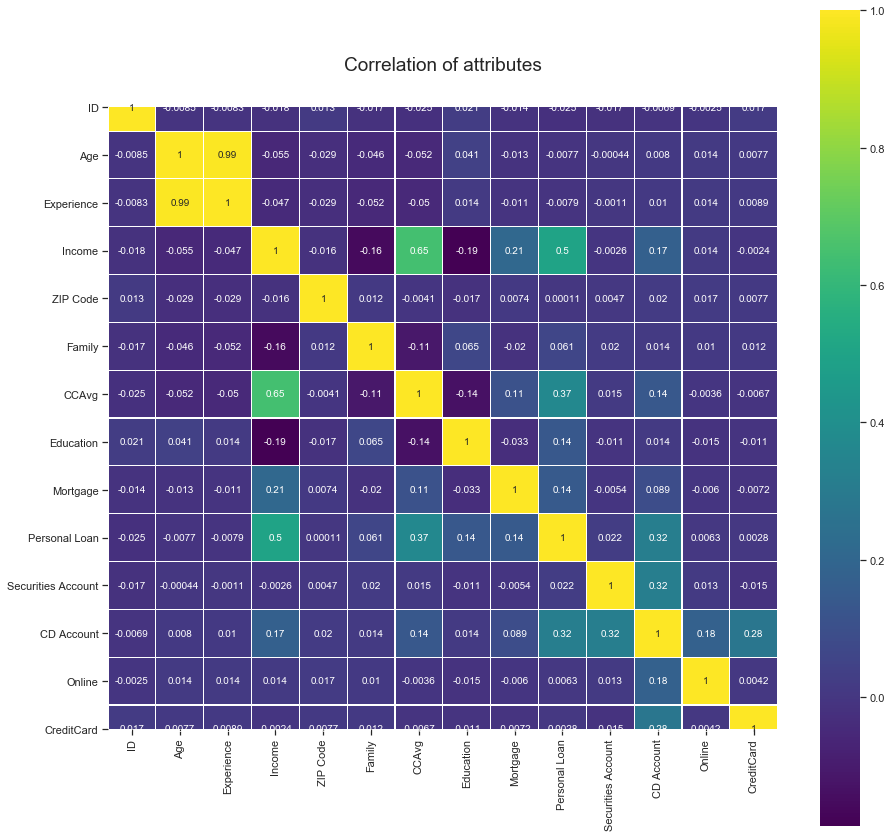

In [8]:
# Correlation Plot
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Correlation of attributes', y=1.05, size=19)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [9]:
# Observations
#1.There is strong positive correlation between age and Experience
#2.Also high correlation between CCAvg and Income
#3.Negative correlation between Eduction and Online

In [10]:
# Finding field with missing value
data.isna().sum() # no missing value

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

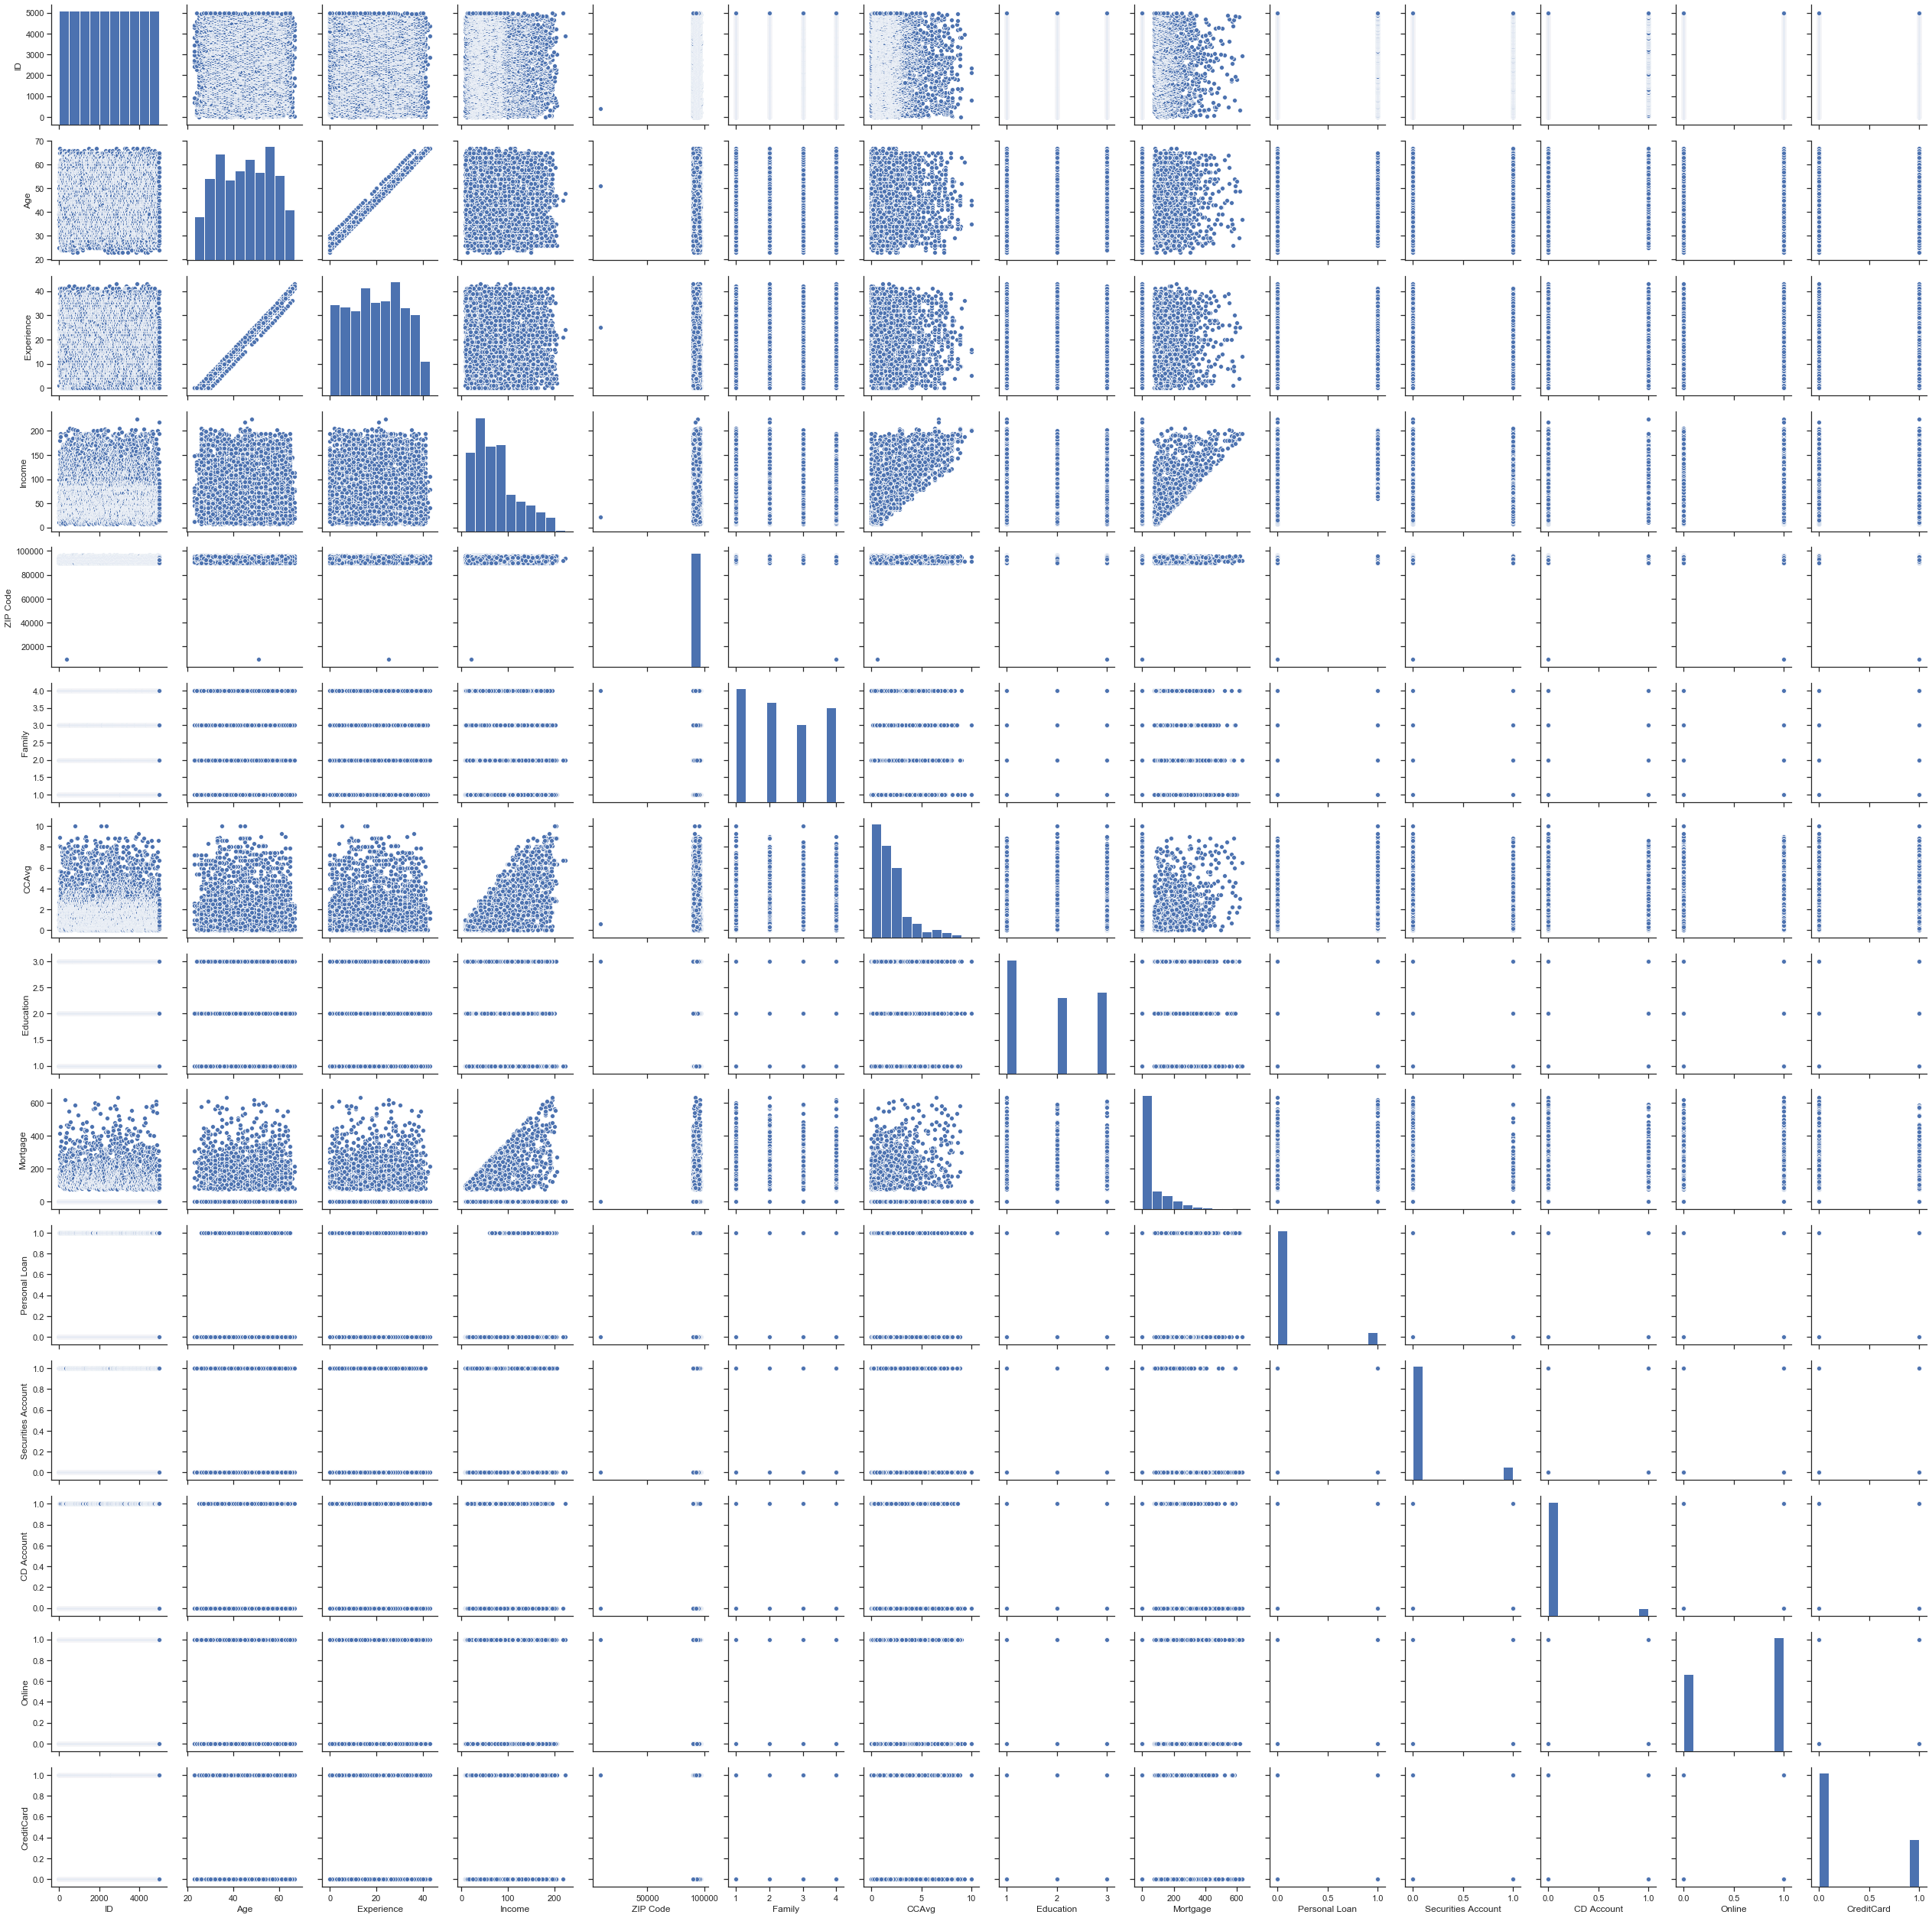

In [11]:
sns.pairplot(data) # plot pairplot

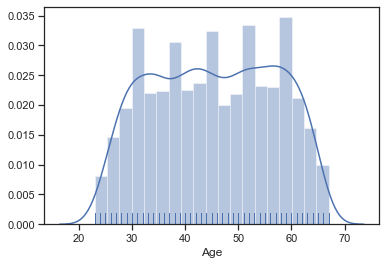

In [12]:
# Plot for attribute Age
sns.distplot(data["Age"],rug= True)

In [13]:
#  We can say most of the customer are between 30 to 60 years range

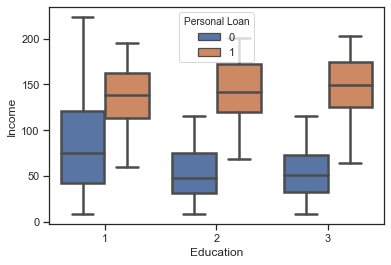

In [14]:
sns.boxplot(x="Education",y="Income",hue="Personal Loan",data=data, linewidth=2.5)

In [15]:
# Observation
# 1.Incom of Education level 1 pepole in more than other two
# 2.Preference of all three level pepole for personal loan is same

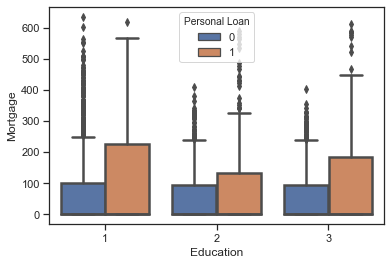

In [16]:
sns.boxplot(x="Education",y="Mortgage",hue="Personal Loan",data=data, linewidth=2.5)

In [17]:
# Observation
# Customer who taken loan have more Martgage

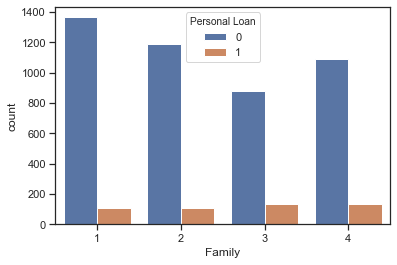

In [18]:
sns.countplot(x='Family', data=data, hue = "Personal Loan",orient = 'v')

In [19]:
# Oservation
# No influence of family member on Personal Loan

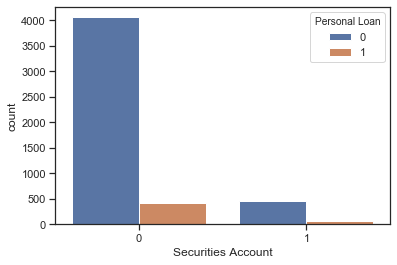

In [20]:
sns.countplot(x='Securities Account', data=data, hue = "Personal Loan",orient = 'v')

In [21]:
# Oservation
# Majority of customer who does not have loan have security account

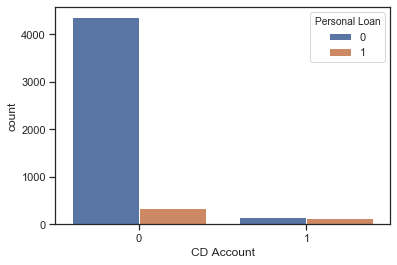

In [22]:
sns.countplot(x='CD Account', data=data, hue = "Personal Loan",orient = 'v')

In [23]:
# Observation
# Almost all the customer who have Personal Loan have CD Account

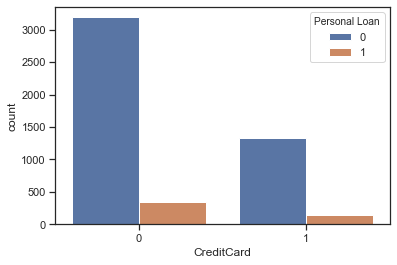

In [24]:
sns.countplot(x='CreditCard', data=data, hue = "Personal Loan",orient = 'v')

# 4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [25]:
train_set, test_set = train_test_split(data.drop(['ID','Experience'],axis=1), test_size=0.3, random_state=100)

In [26]:
train_set.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.398571,73.406571,93165.732571,2.418000,1.927746,1.883143,55.674286,0.092000,0.102571,0.057714,0.602571,0.300000
std,11.403195,45.784535,1766.179423,1.145273,1.746445,0.840053,99.654904,0.289067,0.303442,0.233236,0.489436,0.458323
min,23.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,38.750000,91798.500000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93524.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
test_set.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.198000,74.632000,93121.634000,2.346000,1.961720,1.876000,58.422667,0.105333,0.108667,0.066667,0.583333,0.280000
std,11.604507,46.614102,2780.614636,1.152028,1.750841,0.839699,106.372324,0.307085,0.311324,0.249527,0.493171,0.449149
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92009.000000,1.000000,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,63.000000,93407.000000,2.000000,1.600000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,101.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,218.000000,96651.000000,4.000000,10.000000,3.000000,612.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 # 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)

# DecisionTreeClassifier

In [28]:
train_lables= train_set.pop('Personal Loan')
test_lables= test_set.pop('Personal Loan')

In [29]:
dt_model= DecisionTreeClassifier( criterion='entropy',max_depth=3)
dt_model.fit(train_set,train_lables)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
dt_model.score(test_set,test_lables)

0.9773333333333334

# Navie Bayes

In [31]:
navie_model= GaussianNB()
navie_model.fit(train_set, train_lables)
prediction= navie_model.predict(test_set)
navie_model.score(test_set,test_lables)

0.8866666666666667

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_lables, prediction), index=['No','Yes'], columns=['No','Yes'])
cm.index.name ='Predicted'
cm.columns.name ='True'
cm

True,No,Yes
Predicted,,
No,1234,108
Yes,62,96


# Random Forest Classifier

In [33]:
randomforest_model=RandomForestClassifier(max_depth=2,random_state=0)
randomforest_model.fit(train_set,train_lables)

C:\Users\SUPRIYA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

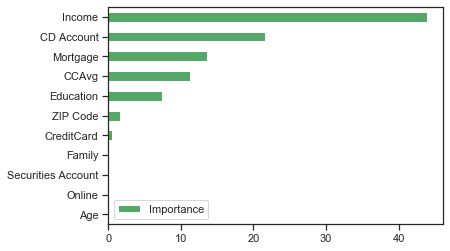

In [34]:
Importance=pd.DataFrame({'Importance': randomforest_model.feature_importances_*100},index= train_set.columns)
Importance.sort_values('Importance',axis=0,ascending= True).plot(kind='barh',color='g')

In [35]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set, test_lables)

0.8993333333333333

# KNN- K -Nearest Neighbour

In [36]:
train_set_indep=data.drop(['Experience','ID'], axis=1).drop('Personal Loan',axis=1)
train_set_dep=data['Personal Loan']
X=np.array(train_set_indep)
Y=np.array(train_set_dep)
X_train=X[ :3500, :]
X_test=X[3501: , :]
Y_train=Y[:3500, ]
Y_test=Y[3501:,]

In [37]:
knn=KNeighborsClassifier(n_neighbors=21,weights='uniform')
knn.fit(X_train,Y_train)
predicted_labels=knn.predict(X_test)
knn.score(X_test, Y_test)

0.9106070713809206

# 6. Print the confusion matrix for all the above models (5 marks)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_lables, prediction), index=['No','Yes'], columns=['No','Yes'])
cm.index.name ='Predicted'
cm.columns.name ='True'
cm

True,No,Yes
Predicted,,
No,1234,108
Yes,62,96


# 7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

# Conclusion
Accuracy by Decision_Tree_model= 0.97733, Navie Bayes=0.8866, Random Forest Classifier=0.8993, KNN=0.9106
From all graph it seems that accuracy of Decision Tree is greater than all models.So we can choose as final model.